In [9]:
%matplotlib inline

In [8]:
import os
from PIL import Image
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from IPython.display import clear_output
import cv2

In [1]:
import keras
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, InputLayer, Dropout

Using TensorFlow backend.


In [10]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

In [11]:
train.head()

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE


In [12]:
test.head()

,ID
0,25321.jpg
1,989.jpg
2,19277.jpg
3,13093.jpg
4,5367.jpg


Age:  MIDDLE


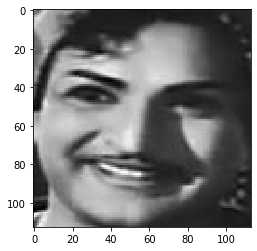

In [13]:
i = random.choice(train.index)

img_name = train.ID[i]
img = cv2.imread(os.path.join('./Train', img_name))

print('Age: ', train.Class[i])
plt.imshow(img)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
temp = []
count = 0
for img_name in train.ID:
    img_path = os.path.join('./Train/', img_name)
    img = Image.open(img_path).convert('LA')
    img = img.resize((64, 64))
    temp.append(img)
    clear_output()
    count+=1
    print(count)

train_x = np.stack(temp)

19906


In [16]:
temp = []
count = 0
for img_name in test.ID:
    img_path = os.path.join('./Test/', img_name)
    img = Image.open(img_path).convert('LA')
    img = img.resize((64, 64))
    temp.append(img)
    clear_output()
    count+=1
    print(count)

test_x = np.stack(temp)

6636


In [17]:
train_x = train_x / 255.
test_x = test_x / 255.

In [18]:
train.Class.value_counts(normalize=True)

MIDDLE    0.542751
YOUNG     0.336883
OLD       0.120366
Name: Class, dtype: float64

In [19]:
lb = LabelEncoder()
train_y = lb.fit_transform(train.Class)
train_y = keras.utils.np_utils.to_categorical(train_y)

In [20]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(64,64,2)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

W0625 21:55:36.230805 14444 deprecation_wrapper.py:119] From c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0625 21:55:51.869289 14444 deprecation_wrapper.py:119] From c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0625 21:55:59.919022 14444 deprecation_wrapper.py:119] From c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0625 21:56:04.164508 14444 deprecation_wrapper.py:119] From c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

W0625 21:56:04.738467 14444 deprecation_wrapper.py:119] From c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0625 21:56:04.802463 14444 deprecation_wrapper.py:119] From c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 64)        1216      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 32)        18464     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 58, 58, 32)        9248      
_________________________________________________________________
dropout_2 (Dropout)          (None, 58, 58, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 32)        9248      
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
__________

In [23]:
batch_size = 128
epochs = 30

In [24]:
model.fit(train_x, train_y, batch_size=batch_size,epochs=epochs,verbose=1, validation_split=0.2)

W0625 22:22:00.308779 14444 deprecation.py:323] From c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 15924 samples, validate on 3982 samples
Epoch 1/30
15924/15924 [==============================] - 458s 29ms/step - loss: 1.0175 - acc: 0.5305 - val_loss: 0.9192 - val_acc: 0.5806
Epoch 2/30
15924/15924 [==============================] - 461s 29ms/step - loss: 0.8682 - acc: 0.5934 - val_loss: 0.8500 - val_acc: 0.5929
Epoch 3/30
15924/15924 [==============================] - 471s 30ms/step - loss: 0.8511 - acc: 0.5977 - val_loss: 0.8388 - val_acc: 0.6100
Epoch 4/30
15924/15924 [==============================] - 464s 29ms/step - loss: 0.8350 - acc: 0.6093 - val_loss: 0.8556 - val_acc: 0.5756
Epoch 5/30
15924/15924 [==============================] - 463s 29ms/step - loss: 0.8241 - acc: 0.6117 - val_loss: 0.8124 - val_acc: 0.6118
Epoch 6/30
15924/15924 [==============================] - 471s 30ms/step - loss: 0.8094 - acc: 0.6181 - val_loss: 0.8330 - val_acc: 0.6148
Epoch 7/30
15924/15924 [==============================] - 476s 30ms/step - loss: 0.7956 - acc: 0.6345 - val_loss: 0.8

In [25]:
pred = model.predict_classes(test_x)
pred = lb.inverse_transform(pred)
test['Class'] = pred
test.to_csv('convRes.csv', index=False)